In [1]:
import sqlite3
import math
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import timedelta

In [2]:
db_name='dinofunworld.db'
connection = sqlite3.connect(db_name)
conn_obj = connection.cursor()

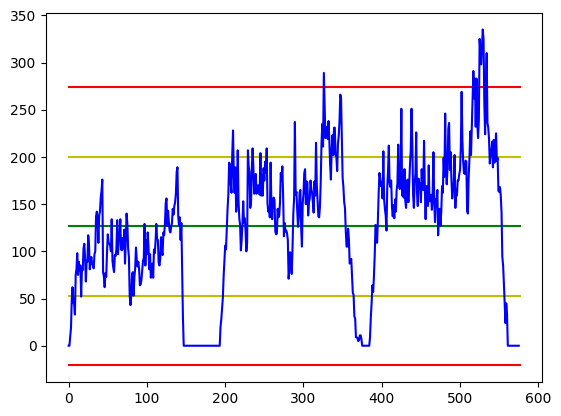

In [11]:
# 1: The park's administrators are worried about the attendance at the ride 'Atmosfear' in the data window. To assuage their fears, they have asked you to create a control chart of the total attendance at this ride. Using the data provided, create a control chart displaying the attendance, the mean, and the standard deviation bands at one and two standard deviations.

import sqlite3
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

db_name='dinofunworld.db'
connection = sqlite3.connect(db_name)
conn_obj = connection.cursor()

def func(pct):
  return "{:1.1f}%".format(pct)

conn_obj.execute("select attractionid from attraction where name='Atmosfear'")
ride_id = conn_obj.fetchone()[0]

conn_obj.execute("select sequence from sequences where sequence like '%" + str(ride_id) + "%'")
sequences = conn_obj.fetchall()

frequency = [0 for _ in range(len(sequences[0][0].split("-")))]
for sequence in sequences:
    for i, ride in enumerate(sequence[0].split("-")):
        if int(ride) == ride_id:
            frequency[i] += 1

mean = np.nanmean(frequency)
std = np.nanstd(frequency)

plt.plot([0, len(frequency)], [mean, mean], 'g-')
plt.plot([0, len(frequency)], [mean+std, mean+std], 'y-')
plt.plot([0, len(frequency)], [mean-std, mean-std], 'y-')
plt.plot([0, len(frequency)], [mean+2*std, mean+2*std], 'r-')
plt.plot([0, len(frequency)], [mean-2*std, mean-2*std], 'r-')
plt.plot(range(len(frequency)), frequency, 'b-')
plt.show()

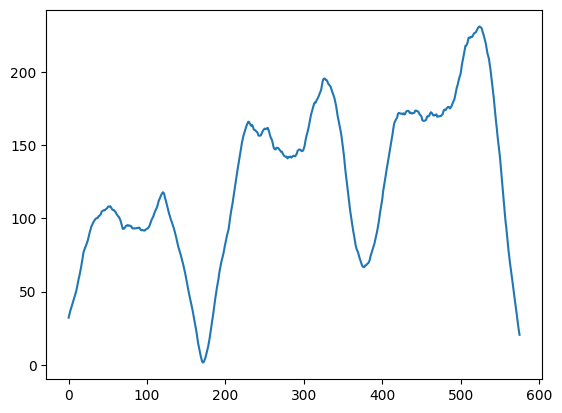

In [15]:
# 2: Some of the park's administrators are having trouble interpreting the control chart graph of 'Atmosfear' attendance, so they ask you to also provide a moving average chart of the attendance in addition to the control chart created in the previous question. In this case, they request that you use 50 samples for the size of the moving average window.

import sqlite3
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

db_name='dinofunworld.db'
connection = sqlite3.connect(db_name)
conn_obj = connection.cursor()

size = 50

conn_obj.execute("select sequence from sequences where sequence like '%" + str(ride_id) + "%'")
sequences = conn_obj.fetchall()

frequency = [0 for _ in range(len(sequences[0][0].split("-")))]
for sequence in sequences:
    for i, ride in enumerate(sequence[0].split("-")):
        if int(ride) == ride_id:
            frequency[i] += 1

plt.plot(np.convolve(frequency, np.ones(size,)/size, 'same'))
plt.show()

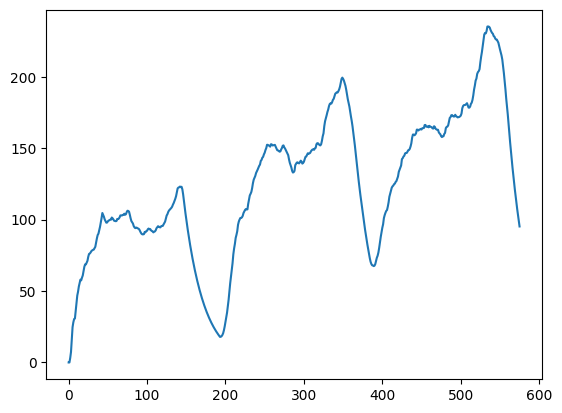

In [14]:
# 3: In order to have options concerning the graphs presented, the park's administrators also ask you to provide a 50-sample moving average window with the average computed with exponential weighting (i.e. an exponentially-weight moving average) over the same 'Atmosfear' attendance data.

conn_obj.execute("select sequence from sequences where sequence like '%" + str(ride_id) + "%'")
sequences = conn_obj.fetchall()

frequency = [0 for _ in range(len(sequences[0][0].split("-")))]
for sequence in sequences:
    for i, ride in enumerate(sequence[0].split("-")):
        if int(ride) == ride_id:
            frequency[i] += 1

size = 50
df = pd.DataFrame({'frequency': frequency})
df_exp = df.ewm(span=size).mean()
plt.plot(df_exp)
plt.show()